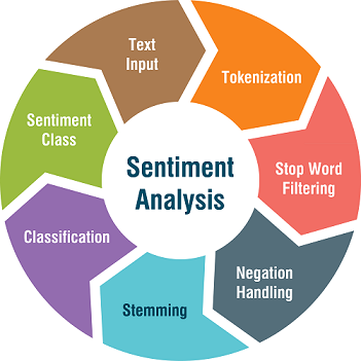
                            fig:1

In [1]:
#import required libraries
import pandas as pd # data processing/manipulation
import numpy as np # linear algebra
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#!pip install wordcloud

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/reenasehitya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
#pip install missingno

In [94]:
import missingno as msno 

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reenasehitya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import os
import warnings

In [8]:
os.getcwd()

'/Users/reenasehitya/GGU/MSBA327/Final Project'

In [9]:
# load dataset
df = pd.read_csv('1429_1.csv')
df.head()

/Users/reenasehitya/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [10]:
# To check the the dimensionality of our DataFrame
df.shape # there are 34660 rows and 21 columns

(34660, 21)

In [11]:
# To understand all the column available in the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [99]:
#Checking missing values.
df.isna().sum() # there are various columns with missing values, specially column 'name',

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [100]:
sns.set_style('whitegrid')

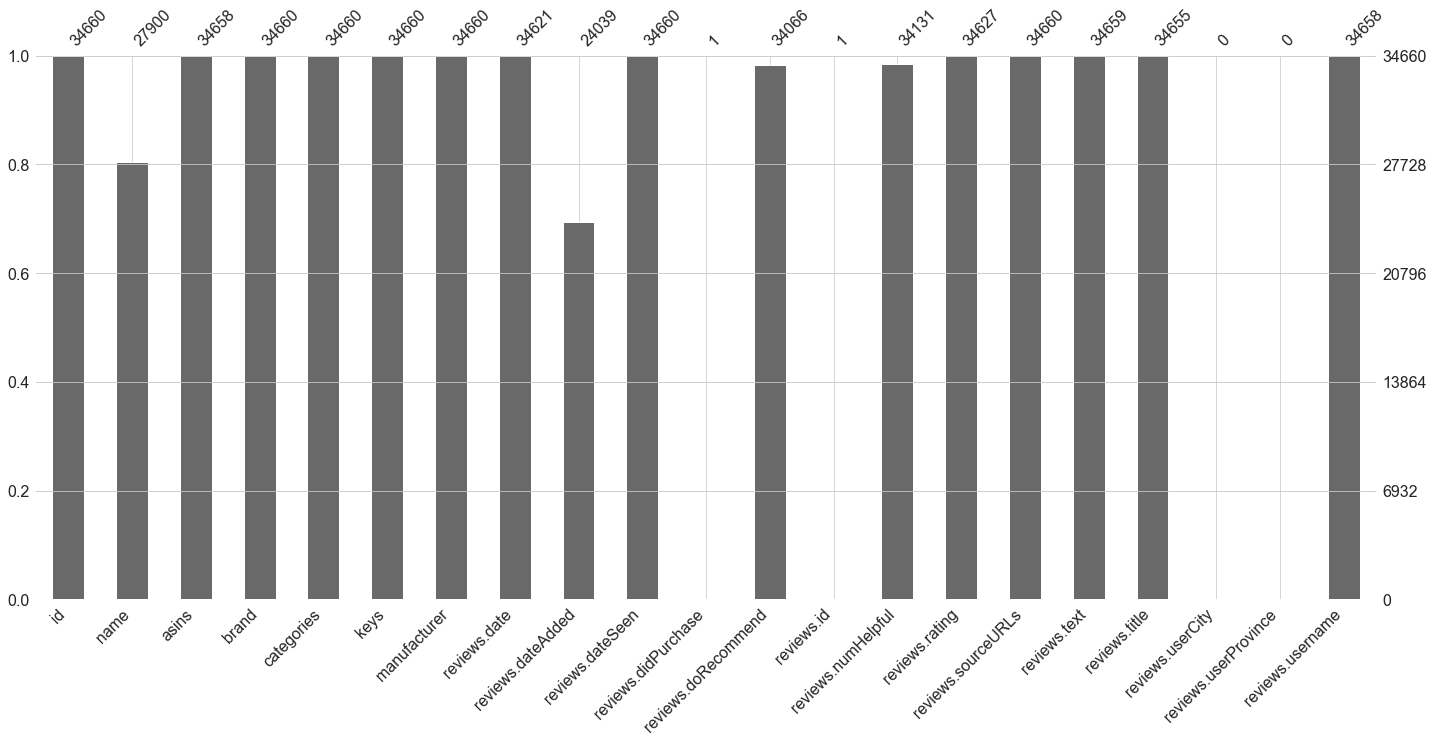

In [105]:
# Visualize missing values as a matrix 
msno.bar(df) 
plt.show()

In order to carry on sentiment analysis, we will be working with columns *reviews.text and *reviews.rating only

In [102]:
data = df[['id','reviews.text', 'reviews.rating']]
# I have selected column 'id' instaed of column 'name' because 'name' column has missing values

In [103]:
data.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [17]:
# To describe on object data types
data.describe(include=["O"])

,id,reviews.text
count,34660,34659
unique,42,34659
top,AVphgVaX1cnluZ0-DR74,"Easy to install, nice alternative to cable gre..."
freq,10966,1


The above table shows that there are 42 unique products and we're going to find out sentiments associated with these 42 products.

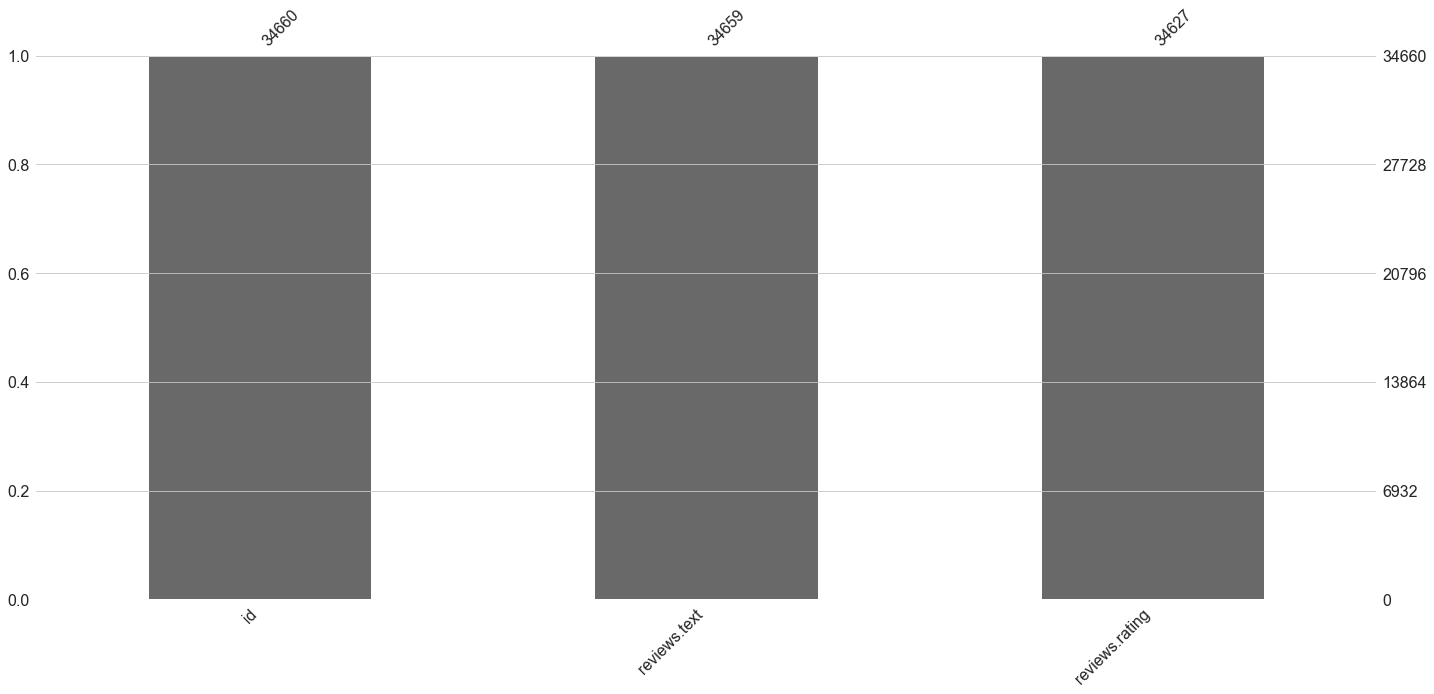

In [104]:
import missingno as msno 
msno.bar(data) 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34660 non-null  object 
 1   reviews.text    34659 non-null  object 
 2   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


As we can see that there is one value missing in column *reviews.text* whereas there are 32 missing values for the column *reviews.rating*. Since, we have sufficient number of instances, we're going to remove all those instances with missing values instead of replacing NaN with the mean of the others.

In [20]:
data = data.dropna()
data.info() # now we will be working on 34626 instances.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34626 non-null  object 
 1   reviews.text    34626 non-null  object 
 2   reviews.rating  34626 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


### Preprocessing Text

#### For data

In [21]:
#lower case all text
data["reviews.text"]=data["reviews.text"].str.lower() 
#tokenizg roation of words
data['reviews.text'] = data.apply(lambda row: word_tokenize(row['reviews.text']), axis=1) 

#only alphanumerical values
data["reviews.text"] = data['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
data['reviews.text'] = data['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
data['reviews.text'] = data['reviews.text'].apply(lambda x: [item for item in x if item not in stop])

In [22]:
data["reviews.text"] = data["reviews.text"].apply(lambda x: str(' '.join(x))) #joining all tokens

In [23]:
data.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0


### Exploratory Data Analysis

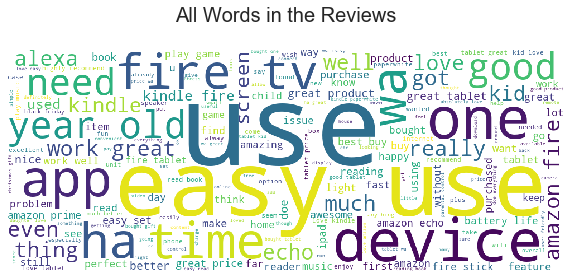

In [24]:
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

Words in the above results doesn't convey sentiments embedded in comments. Now I will perform a word count of certain words that could describe the sentiment in a better way.

In [25]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']


In [26]:
data['reviews.text']

0        product far ha disappointed child love use lik...
1        great beginner experienced person bought gift ...
2        inexpensive tablet use learn step nabi wa thri...
3        fire hd two week love tablet great prime membe...
4        bought grand daughter come visit set user ente...
                               ...                        
34655    appreciably faster higher amp charger used kin...
34656    amazon include charger kindle fact charging u ...
34657    love kindle fire really disappointed kindle po...
34658    wa surprised find come type charging cord purc...
34659    spite fact nothing good thing say amazon anthi...
Name: reviews.text, Length: 34626, dtype: object

In [27]:
rt = " ".join(data['reviews.text'])

In [28]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1

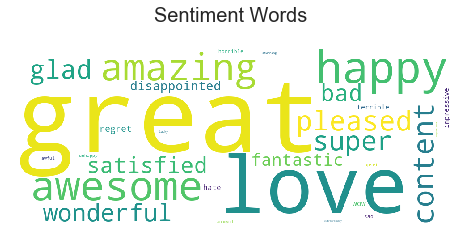

In [29]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

The result of the above wordcloud suggests that most of the comments are positive. Now, we will look at the total count each of the **reviews.rating** to see if there's any biased towards higher ratings

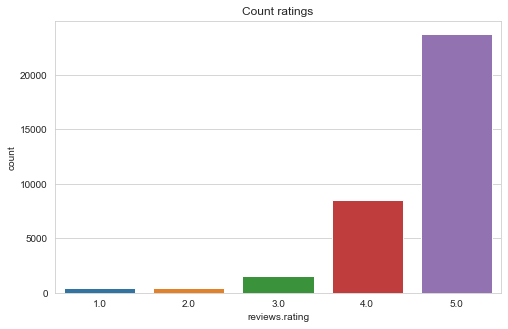

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data['reviews.rating'])
plt.title('Count ratings')
plt.show()

The above count result shows majority of the ratings is 5. This suggests that data is highly biased towards high ratings

Now one thing that can be done is to view the average rating for every product. Since, many instances of product name column in our original dataset are missing so we decided to work with product Id instead to find out average ratings per product. 

In [31]:
data.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0


In [32]:
data1 = data.groupby("id")['reviews.rating'].mean().reset_index()

In [33]:
data1.head()

,id,reviews.rating
0,AV1YE_muvKc47QAVgpwE,4.707278
1,AV1YnR7wglJLPUi8IJmi,4.424731
2,AV1YnRtnglJLPUi8IJmV,4.772355
3,AVpe7AsMilAPnD_xQ78G,4.666667
4,AVpe9CMS1cnluZ0-aoC5,4.000000


In [34]:
data1 = data1.sort_values(['reviews.rating'])
data1.head()

,id,reviews.rating
9,AVpfiBlyLJeJML43-4Tp,2.461538
6,AVpf_4sUilAPnD_xlwYV,3.066667
37,AVzvXXwEvKc47QAVfRhx,3.125000
7,AVpf_znpilAPnD_xlvAF,3.500000
13,AVpg3q4RLJeJML43TxA_,3.666667


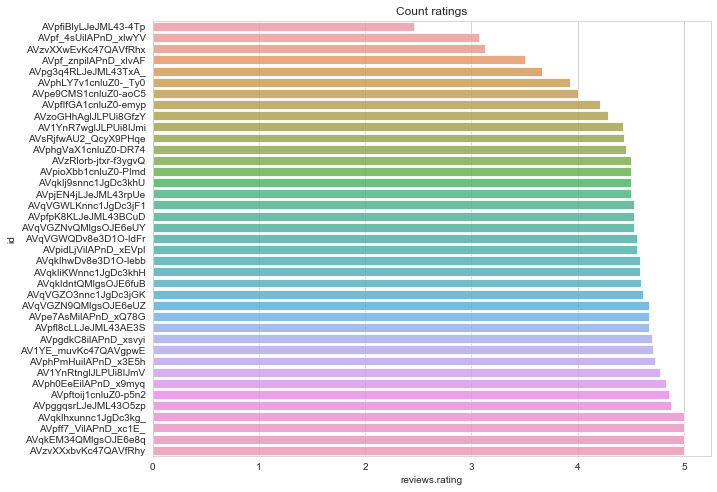

In [110]:
plt.figure(figsize=(10,8))
sns.barplot(x=data1["reviews.rating"], y=data1["id"], alpha = 0.8)
plt.title('Count ratings')
plt.show()

As we can clearly see that the reviews are heavily biased towards positive reviews and higher ratings: 4 and 5. In order to deal with this biasness of data, we decided to add the other two csv files and get only the reviews that have ratings lower or equal to 3

In [37]:
# load dataset
df2 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df3 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [38]:
data2 = df2[["id","reviews.text","reviews.rating"]]
data3 = df3[["id","reviews.text","reviews.rating"]]

In [39]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [106]:
len(data2), len(data3)

(2787, 314)

In [108]:
data2.isna().sum()

id                0
reviews.text      0
reviews.rating    0
dtype: int64

In [109]:
data2.isna().sum()

id                0
reviews.text      0
reviews.rating    0
dtype: int64

### Now, we will pre-process data2 and data3

#### For data2

In [41]:
#lower case all text
data2["reviews.text"]=data2["reviews.text"].str.lower() 

#tokenization of words
data2['reviews.text'] = data2.apply(lambda row: word_tokenize(row['reviews.text']), axis=1) 

# all the characters in the string are alphabetic only
data2["reviews.text"] = data2['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
data2['reviews.text'] = data2['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
data2['reviews.text'] = data2['reviews.text'].apply(lambda x: [item for item in x if item not in stop])

In [42]:
data2["reviews.text"] = data2["reviews.text"].apply(lambda x: str(' '.join(x))) #joining all tokens

#### For data3

In [43]:
#lower case all text
data3["reviews.text"]=data3["reviews.text"].str.lower() 

#tokenization of words
data3['reviews.text'] = data3.apply(lambda row: word_tokenize(row['reviews.text']), axis=1) 

# all the characters in the string are alphabetic only
data3["reviews.text"] = data3['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
data3['reviews.text'] = data3['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
data3['reviews.text'] = data3['reviews.text'].apply(lambda x: [item for item in x if item not in stop])

In [44]:
data3["reviews.text"] = data3["reviews.text"].apply(lambda x: str(' '.join(x))) #joining all tokens

In [45]:
data2.head()

,id,reviews.text,reviews.rating
0,AVpgNzjwLJeJML43Kpxn,order one item bad quality missing backup spri...,3
8,AVpgNzjwLJeJML43Kpxn,hold amount high power juice like energizer du...,3
11,AVpgNzjwLJeJML43Kpxn,first started getting amazon basic battery rea...,3
16,AVpgNzjwLJeJML43Kpxn,know would buy thus brand seems like last long...,1
17,AVpgNzjwLJeJML43Kpxn,opinion last anywhere near long duracel thing ...,2


In [46]:
data3.head()

,id,reviews.text,reviews.rating
0,AVqVGZNvQMlgsOJE6eUY,thought would big small paper turn like palm t...,3
15,AVqVGZNvQMlgsOJE6eUY,doe job would buy one screen brighter time dif...,3
20,AVqVGZNvQMlgsOJE6eUY,wa looking kindle whitepaper saw online deal o...,1
51,AVqVGZNvQMlgsOJE6eUY,kindle good download apps book catch reading,3
70,AVqVGZNvQMlgsOJE6eUY,looking picture seeing wa generation assumed w...,1


Now, we will concatenate three dataframes: data, data2, data2 together.

In [47]:
frames = [data, data2, data3]
finalData = pd.concat(frames)

In [48]:
type(frames)

list

In [49]:
finalData.count()

id                37727
reviews.text      37727
reviews.rating    37727
dtype: int64

In [50]:
finalData.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0


After concatenating three dataframes: data, data2, data3 and assigned to a new dataframe: finalData, we would like to check if we have been able to remove biasness from our dataset.

Text(0.5, 1.0, 'rating counts')

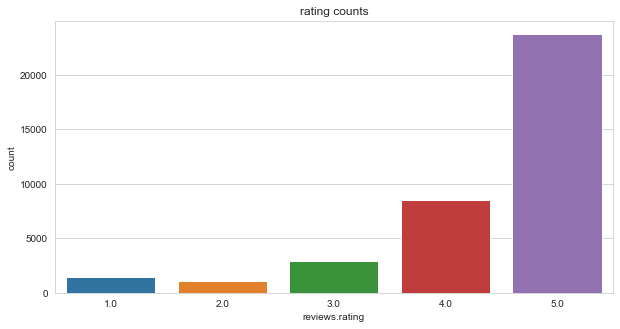

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(finalData['reviews.rating'], alpha = 1)
plt.title('rating counts')

Unfortunately, we are still seeing that rating '5' is far ahead of other lower ratings. Still there's biasness in our dataset. We will try to tran the model to see if there's any differences later on or not

Next, we will assign a sentiment to all of the ratings. 
* we will assign positive sentiment (1) for the ratings are 4 and 5
* we will assign a negative sentiment (0) for the ratings are 1,2,3

### 2 Labels

In [112]:
# Mapping sentiment postive, negative to the reviews.rating
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}
finalData['sentiment'] = finalData['reviews.rating'].map(sentiment)

In [53]:
finalData.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,1
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,1
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,1
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,1
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,1


We can see that we have successfully added sentiment column mapped with the *reviews.rating* column

In [54]:
finalData["sentiment"].value_counts() # 1: positive sentiment, 0: negative sentiment

1    32315
0     5412
Name: sentiment, dtype: int64

The above result shows that our data is heavily biased towards positive sentiments. There's one way to deal with biased data is to undersample the positive sentiments. Before undersampling the positive sentiments, I would like to see how model is perfroming using biased data.

In [55]:
# building tfidf matrix to train models 
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(finalData["reviews.text"])

In [57]:
text

<37727x12218 sparse matrix of type '<class 'numpy.float64'>'
	with 526677 stored elements in Compressed Sparse Row format>

### Model Selection

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.metrics import classification_report

In [118]:
x_train, x_test, y_train, y_test = train_test_split(text, finalData["sentiment"], 
                                                    test_size=0.3, 
                                                    random_state=101)

In [153]:
# we will try logistic regression first
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

/Users/reenasehitya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [156]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))

Test accuracy 0.9055570280060076


In [157]:
print("Classification Report", '\n')
print(classification_report(y_test, y_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.77      0.58      0.66       753
           1       0.73      0.23      0.35       879
           2       0.92      0.99      0.95      9687

    accuracy                           0.91     11319
   macro avg       0.81      0.60      0.66     11319
weighted avg       0.89      0.91      0.89     11319



By seeing the precision, recall and f1-score, we can verify how well the model has learnt to classify each label. 
The test scores are not that good for the negative reviews, so we will try to use another classification model: Random forest

In [158]:
# We will use Random Forests
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

In [123]:
print("Classification Report", '\n')
print(classification_report(y_test, y_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1632
           1       0.94      0.99      0.96      9687

    accuracy                           0.94     11319
   macro avg       0.94      0.80      0.85     11319
weighted avg       0.94      0.94      0.93     11319



In [159]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))

Test accuracy 0.9274670907323969


The precision rate(0.94) for both negative and positive sentiments is higher and performed better than Logistic regression. Even if we compare the recall and f1-score of negative sentiments, we will find that the Random Forests model (recall:0.61,f1-score:0.74) has performed better again than Logistic regression (recall:0.50,f1-score:0.64). In terms of accuracy rate, Random Forests model (0.9274) has performed better than Logistic Regression (0.9055). We will try to improve this score by adding third label 'neutral'. 



### overall the performance is satisfactory and now we will try to add a third label, the neutral sentiment value for better results

### 3 Labels
Trying with neutral, negative and positive

In [124]:
sentiment = {1: 0,
             2: 0,
             3: 1,
             4: 2,
             5: 2}

In [125]:
finalData['sentiment'] = finalData['reviews.rating'].map(sentiment)

In [126]:
finalData.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,2
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,2
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,2
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,2
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,2


In [127]:
finalData['sentiment'].value_counts() # 2: positive sentiment, 1: neutral sentiment 0: negative sentiment

2    32315
1     2902
0     2510
Name: sentiment, dtype: int64

Still we can see that our data is heavily biased towards the positive sentiment.

In [128]:
# building tfidf matrix to train models 
vectorizer1 =TfidfVectorizer(max_df=0.9)
text1 = vectorizer.fit_transform(finalData["reviews.text"])

In [134]:
x_train, x_test, y_train, y_test = train_test_split(text1, finalData["sentiment"], 
                                                    test_size=0.3, 
                                                    random_state=101)

In [149]:
# we will again try to run logistic regression model first
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

/Users/reenasehitya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [150]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))

Test accuracy 0.9055570280060076


In [151]:
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       753
           1       0.73      0.23      0.35       879
           2       0.92      0.99      0.95      9687

    accuracy                           0.91     11319
   macro avg       0.81      0.60      0.66     11319
weighted avg       0.89      0.91      0.89     11319



In [147]:
# we will again run random forest 
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

In [148]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))

Test accuracy 0.9274670907323969


In [145]:
print("Classification Report", '\n')
print(classification_report(y_test, y_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.61      0.71       753
           1       0.92      0.43      0.59       879
           2       0.93      1.00      0.96      9687

    accuracy                           0.93     11319
   macro avg       0.91      0.68      0.76     11319
weighted avg       0.93      0.93      0.92     11319



If we compare the performance of Logistic regression with that of the random forest after adding third label *neutral sentiment*, it is pretty apparently that based on:
* Accuracy score: Accuracy score of Random forest (0.9274) is higher than that of the logistic regression (0.9055)
* Precision scores for all three sentiments- negative:0,nuetral:1,positive: 2 are better in Random Forest model than logistic regression
* Recall rates for all three sentiments- negative:0,nuetral:1,positive: 2 are better in Random Forest model than logistic regression
* F1-score for all three sentiments- negative:0,nuetral:1,positive: 2 are better in Random Forest model than logistic regression


Through model evaluation, we have decided to go with the latest Random Forest model with label three as it provide better results. However, the results can be improved by balancing the dataset either through increasing the number of negative and neutral labels or by decreasing the positive labels.

I would like to acknowlege Mike Calvi's work that I referred for my final project.


#### References:

Calvi, M. (2019, July 08). Amazon Reviews Sentiment Analysis. Retrieved December 15, 2020, from https://www.kaggle.com/lele1995/amazon-reviews-sentiment-analysis

Jayaprakash, A. (2020, November 1). Building a sentiment classification model [Digital image]. Retrieved December 15, 2020, from https://abinaya-j.medium.com/building-a-sentiment-classification-model-a2b5fe24e9a1


                                            *** End of Project***